In [1]:
# Time Series Forecasting - Temperature Prediction
#Dataset: Daily Min Temperatures - Melbourne

In [2]:
#  Import Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [4]:
# URL to the dataset

In [5]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"

In [6]:
# Load the dataset

In [8]:
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
print(data.head())

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


In [9]:
#  Data Preprocessing
# Plot the time series


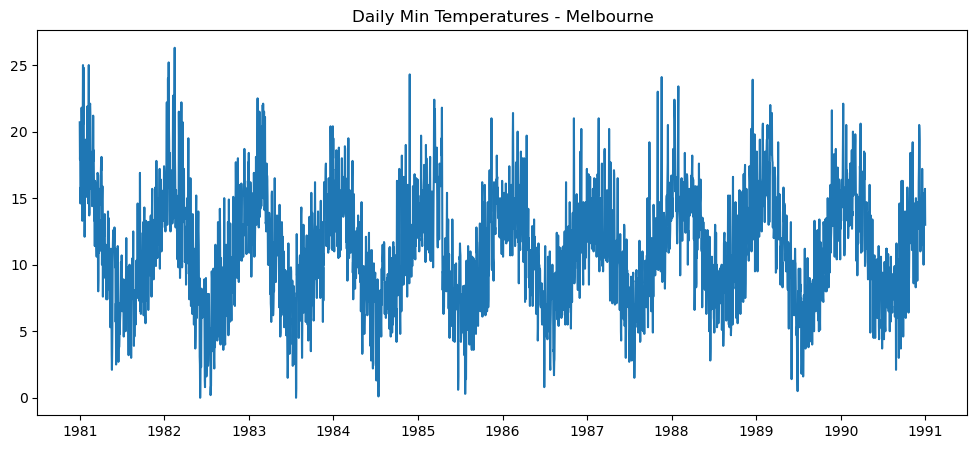

In [10]:
plt.figure(figsize=(12, 5))
plt.plot(data['Temp'])
plt.title('Daily Min Temperatures - Melbourne')
plt.show()

In [11]:
# Scaling the data

In [12]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [13]:
# Prepare the dataset for LSTM

In [14]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [15]:
seq_length = 30
X, y = create_sequences(data_scaled, seq_length)

In [16]:
# Train-Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Model Building and Training

In [19]:
model = Sequential([
    LSTM(64, input_shape=(seq_length, 1), return_sequences=True),
    LSTM(32, return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

C:\Users\Verghese\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0490 - val_loss: 0.0126
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0116 - val_loss: 0.0117
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0113 - val_loss: 0.0117
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0114 - val_loss: 0.0112
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0110 - val_loss: 0.0110
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0102 - val_loss: 0.0109
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0100 - val_loss: 0.0111
Epoch 8/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0098 - val_loss: 0.0103
Epoch 9/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0096 - val_loss: 0.0098
Epoch 10/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0087 - val_loss: 0.0094
Epoch 11/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0088 - val_loss: 0.0094
Epoch 12/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0

In [20]:
# Evaluation

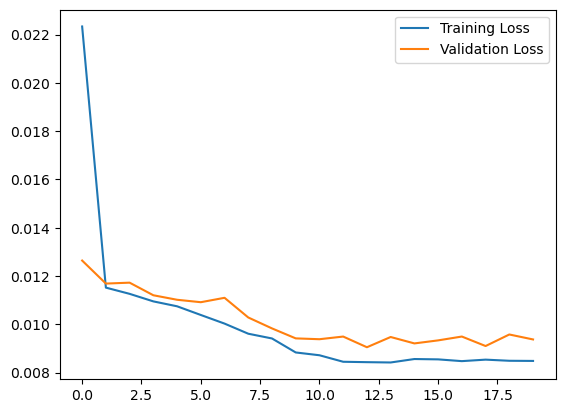

In [21]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [22]:
# Predictions

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


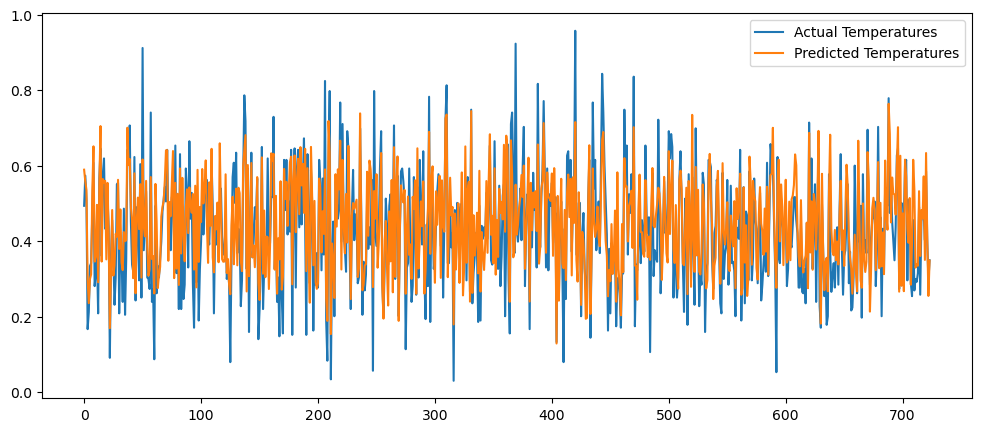

In [23]:
y_pred = model.predict(X_test)
plt.figure(figsize=(12, 5))
plt.plot(y_test, label='Actual Temperatures')
plt.plot(y_pred, label='Predicted Temperatures')
plt.legend()
plt.show()